In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
path = r"C:\Users\asus\OneDrive\Desktop\SEM VII\3. Deep learning\LP-IV-datasets\Object Detection(Ass6)\caltech-101-img"

img_gen = ImageDataGenerator(rescale=1./255)

In [7]:
ds_gen = img_gen.flow_from_directory(path,
                                     class_mode='categorical',
                                     target_size=(64,64),
                                     batch_size=2000,
                                     )

Found 9144 images belonging to 102 classes.


In [8]:
x_train, y_train = ds_gen[0]
x_test, y_test = ds_gen[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [10]:
from tensorflow.keras.applications import VGG16


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64,64,3))

In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [14]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
pred = Dense(102, activation='softmax')(x)

mod = Model(inputs=base_model.input, outputs=pred)
mod.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
mod.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=512, epochs=2)

Epoch 1/2
4/4 [==============================] - 105s 29s/step - loss: 4.4885 - accuracy: 0.0925 - val_loss: 4.1877 - val_accuracy: 0.1470
Epoch 2/2
4/4 [==============================] - 99s 29s/step - loss: 4.0297 - accuracy: 0.1515 - val_loss: 3.9385 - val_accuracy: 0.1890


In [15]:
from tensorflow.keras.optimizers import Adam

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64,64,3))

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers[len(base_model.layers)-2:]:
    layer.trainable = True
    
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predi = Dense(102, activation='softmax')(x)

mod = Model(inputs=base_model.inputs,outputs = predi)
mod.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])
mod.fit(x_train, y_train, validation_data=(x_test,y_test),batch_size=64,epochs=2)

Epoch 1/2
32/32 [==============================] - 114s 3s/step - loss: 3.1392 - accuracy: 0.3530 - val_loss: 2.3608 - val_accuracy: 0.4850
Epoch 2/2
32/32 [==============================] - 105s 3s/step - loss: 1.8356 - accuracy: 0.5615 - val_loss: 1.8941 - val_accuracy: 0.5685


In [16]:
import matplotlib.pyplot as plt
y_pred = mod.predict(x_test)

63/63 [==============================] - 52s 816ms/step


In [17]:
labels = list(ds_gen.class_indices.keys())

predicted: Motorbikes
actual: Motorbikes


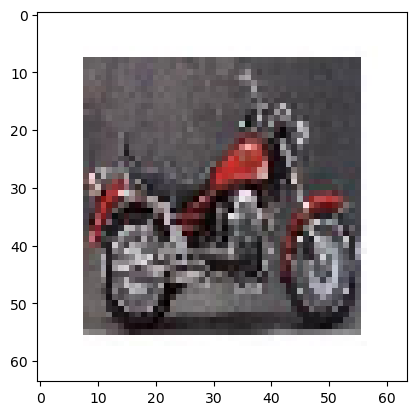

In [18]:
n = 888
plt.imshow(x_test[n])
print("predicted:", labels[np.argmax(y_pred[n])])
print("actual:", labels[np.argmax(y_test[n])])